In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
from scipy.stats import multivariate_normal
from matplotlib.lines import Line2D

In [12]:
# Path to the JSON file
file_path = './gmm_data.json'

# Open and read the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Now `data` is a Python dictionary containing the parsed JSON
print(data)

{'weights': [0.4523924591096934, 0.40288109714245784, 0.1447264437478487], 'means': [[-2.109728752946341, -0.5194915027868183, 0.041228019939392846, -0.06158984495115073, -0.01233212345443226, -0.031234257836266724, 0.021153358148209452, 0.00671875000817033], [1.9039507302018657, 3.6625766254133043, 0.10298705769743557, 0.015161697581411115, -0.0034289892622677426, 0.018192482232229083, -0.03314511733024777, 0.0074667791602399235], [3.7146972352676864, -2.5302457209130345, -0.05990870850985828, 0.4209667006730955, 0.2017466032007284, -0.060501037056102006, -0.024580285542443982, -0.029317861727270737]], 'cov': [[[0.0529225721716601, -0.0011280911255514964, 0.01148513588700921, -0.09246491698578854, 0.02400646326961715, -0.023567660470127344, -0.006154722183668797, 0.0004555361293980478], [-0.0011280911255514992, 0.0362484915647152, -0.012927504025474653, 0.06407580609920052, -0.028391846186067837, 0.010451587309039306, -0.00865100975090041, -0.001318677960056114], [0.01148513588700921,

In [13]:
for key, values in data.items():
    print(key)

weights
means
cov


In [14]:
means=[]
covariances=[]
for i in range(len(data["means"])):
    means.append(data["means"][i])
    covariances.append(data["cov"][i])

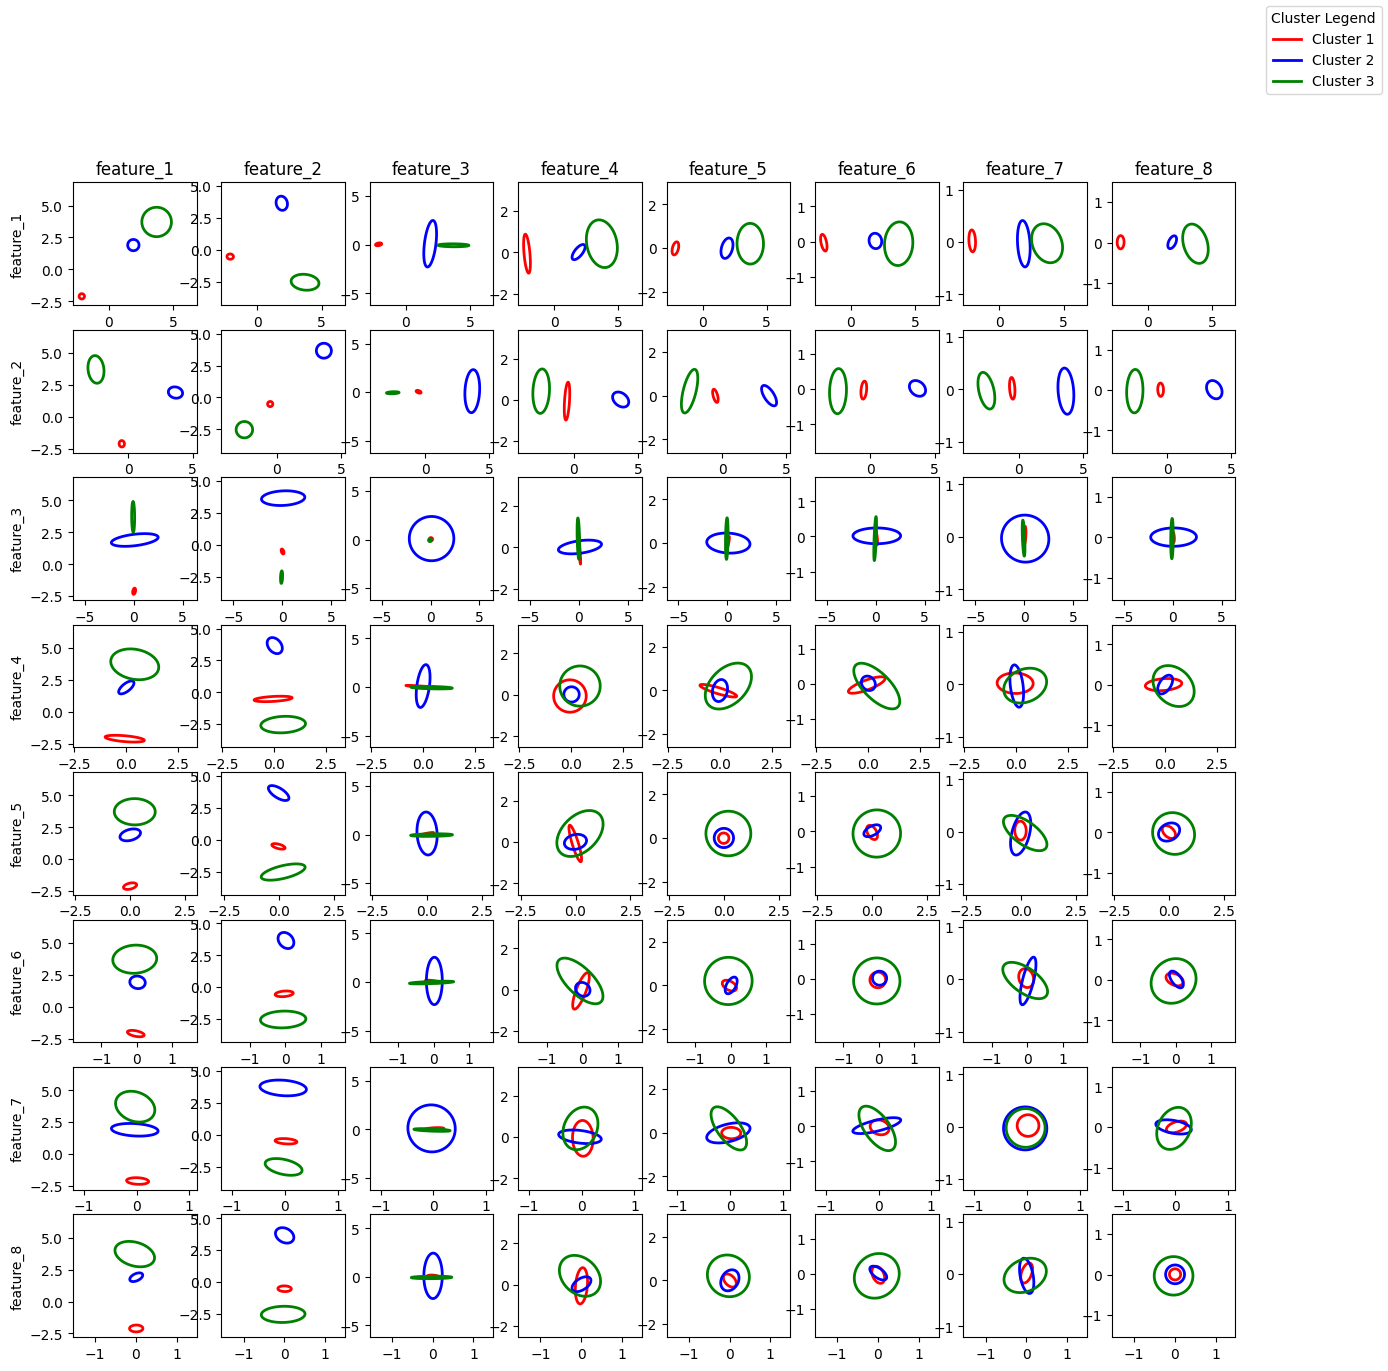

In [15]:


K = len(data["weights"])# Number of cluster
D = len(means[0])  # 8 Dimesion of feature space

n =3 # how far in terms of std you want to plot

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=D, ncols=D, figsize=(15, 15))
label_to_color = { 0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange', 5: 'purple'}

for i in range(K):
    # Create different plot of each cluster
    for j in range(D):
        for k in range(D):
            if j==k:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.diag([covariances[i][j][j], covariances[i][k][k]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1,colors=label_to_color[i], linewidths=2)
                
                
            else:
                mean_ = np.array([means[i][j],means[i][k]])
                cov_  = np.array([[covariances[i][j][j],covariances[i][j][k]],[covariances[i][k][j], covariances[i][k][k]]])
                
                # Create a grid of points
                x, y = np.meshgrid(np.linspace(mean_[0] -n * np.sqrt(cov_[0][0]), mean_[0] +n * np.sqrt(cov_[0][0]), 1000), np.linspace(mean_[1]-n * np.sqrt(cov_[1][1]), mean_[1]+ n * np.sqrt(cov_[1][1]), 1000))
                pos = np.dstack((x, y))
                # Create the multivariate normal distribution
                rv = multivariate_normal(mean_, cov_)
                # Compute the probability density function (PDF) at the grid points
                pdf = rv.pdf(pos)
                axes[j][k].contour(x, y, pdf, levels=1, colors=label_to_color[i], linewidths=2)
                
            #
                
            if j==0:
                axes[j][k].set_title(f'feature_{k+1}')
            if k==0:
                axes[j][k].set_ylabel(f'feature_{j+1}')
                

legend_elements = [Line2D([0], [0], color=color, lw=2, label=f'Cluster {i + 1}')
                   for i, color in label_to_color.items() if i<K]
# Add a legend
lines = [] 
labels = [] 
  
for ax in fig.axes: 
    Line, Label = ax.get_legend_handles_labels() 
    lines.extend(Line) 
    labels.extend(Label)
fig.legend(handles=legend_elements, loc='upper right', title='Cluster Legend')

plt.show() 